## _Importing the required libraries_

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import calendar
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

## _Reading and Understanding the dataset as df_

In [86]:
df = pd.read_csv("day.csv")

In [87]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [88]:
df.shape

(730, 16)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [90]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [91]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## _Data Vizualization_

### Dropping redundant variables

In [92]:
df.drop(["instant","dteday","atemp","casual","registered"], axis = 1, inplace = True)

### Pairplot and heatmap of the numerical variables

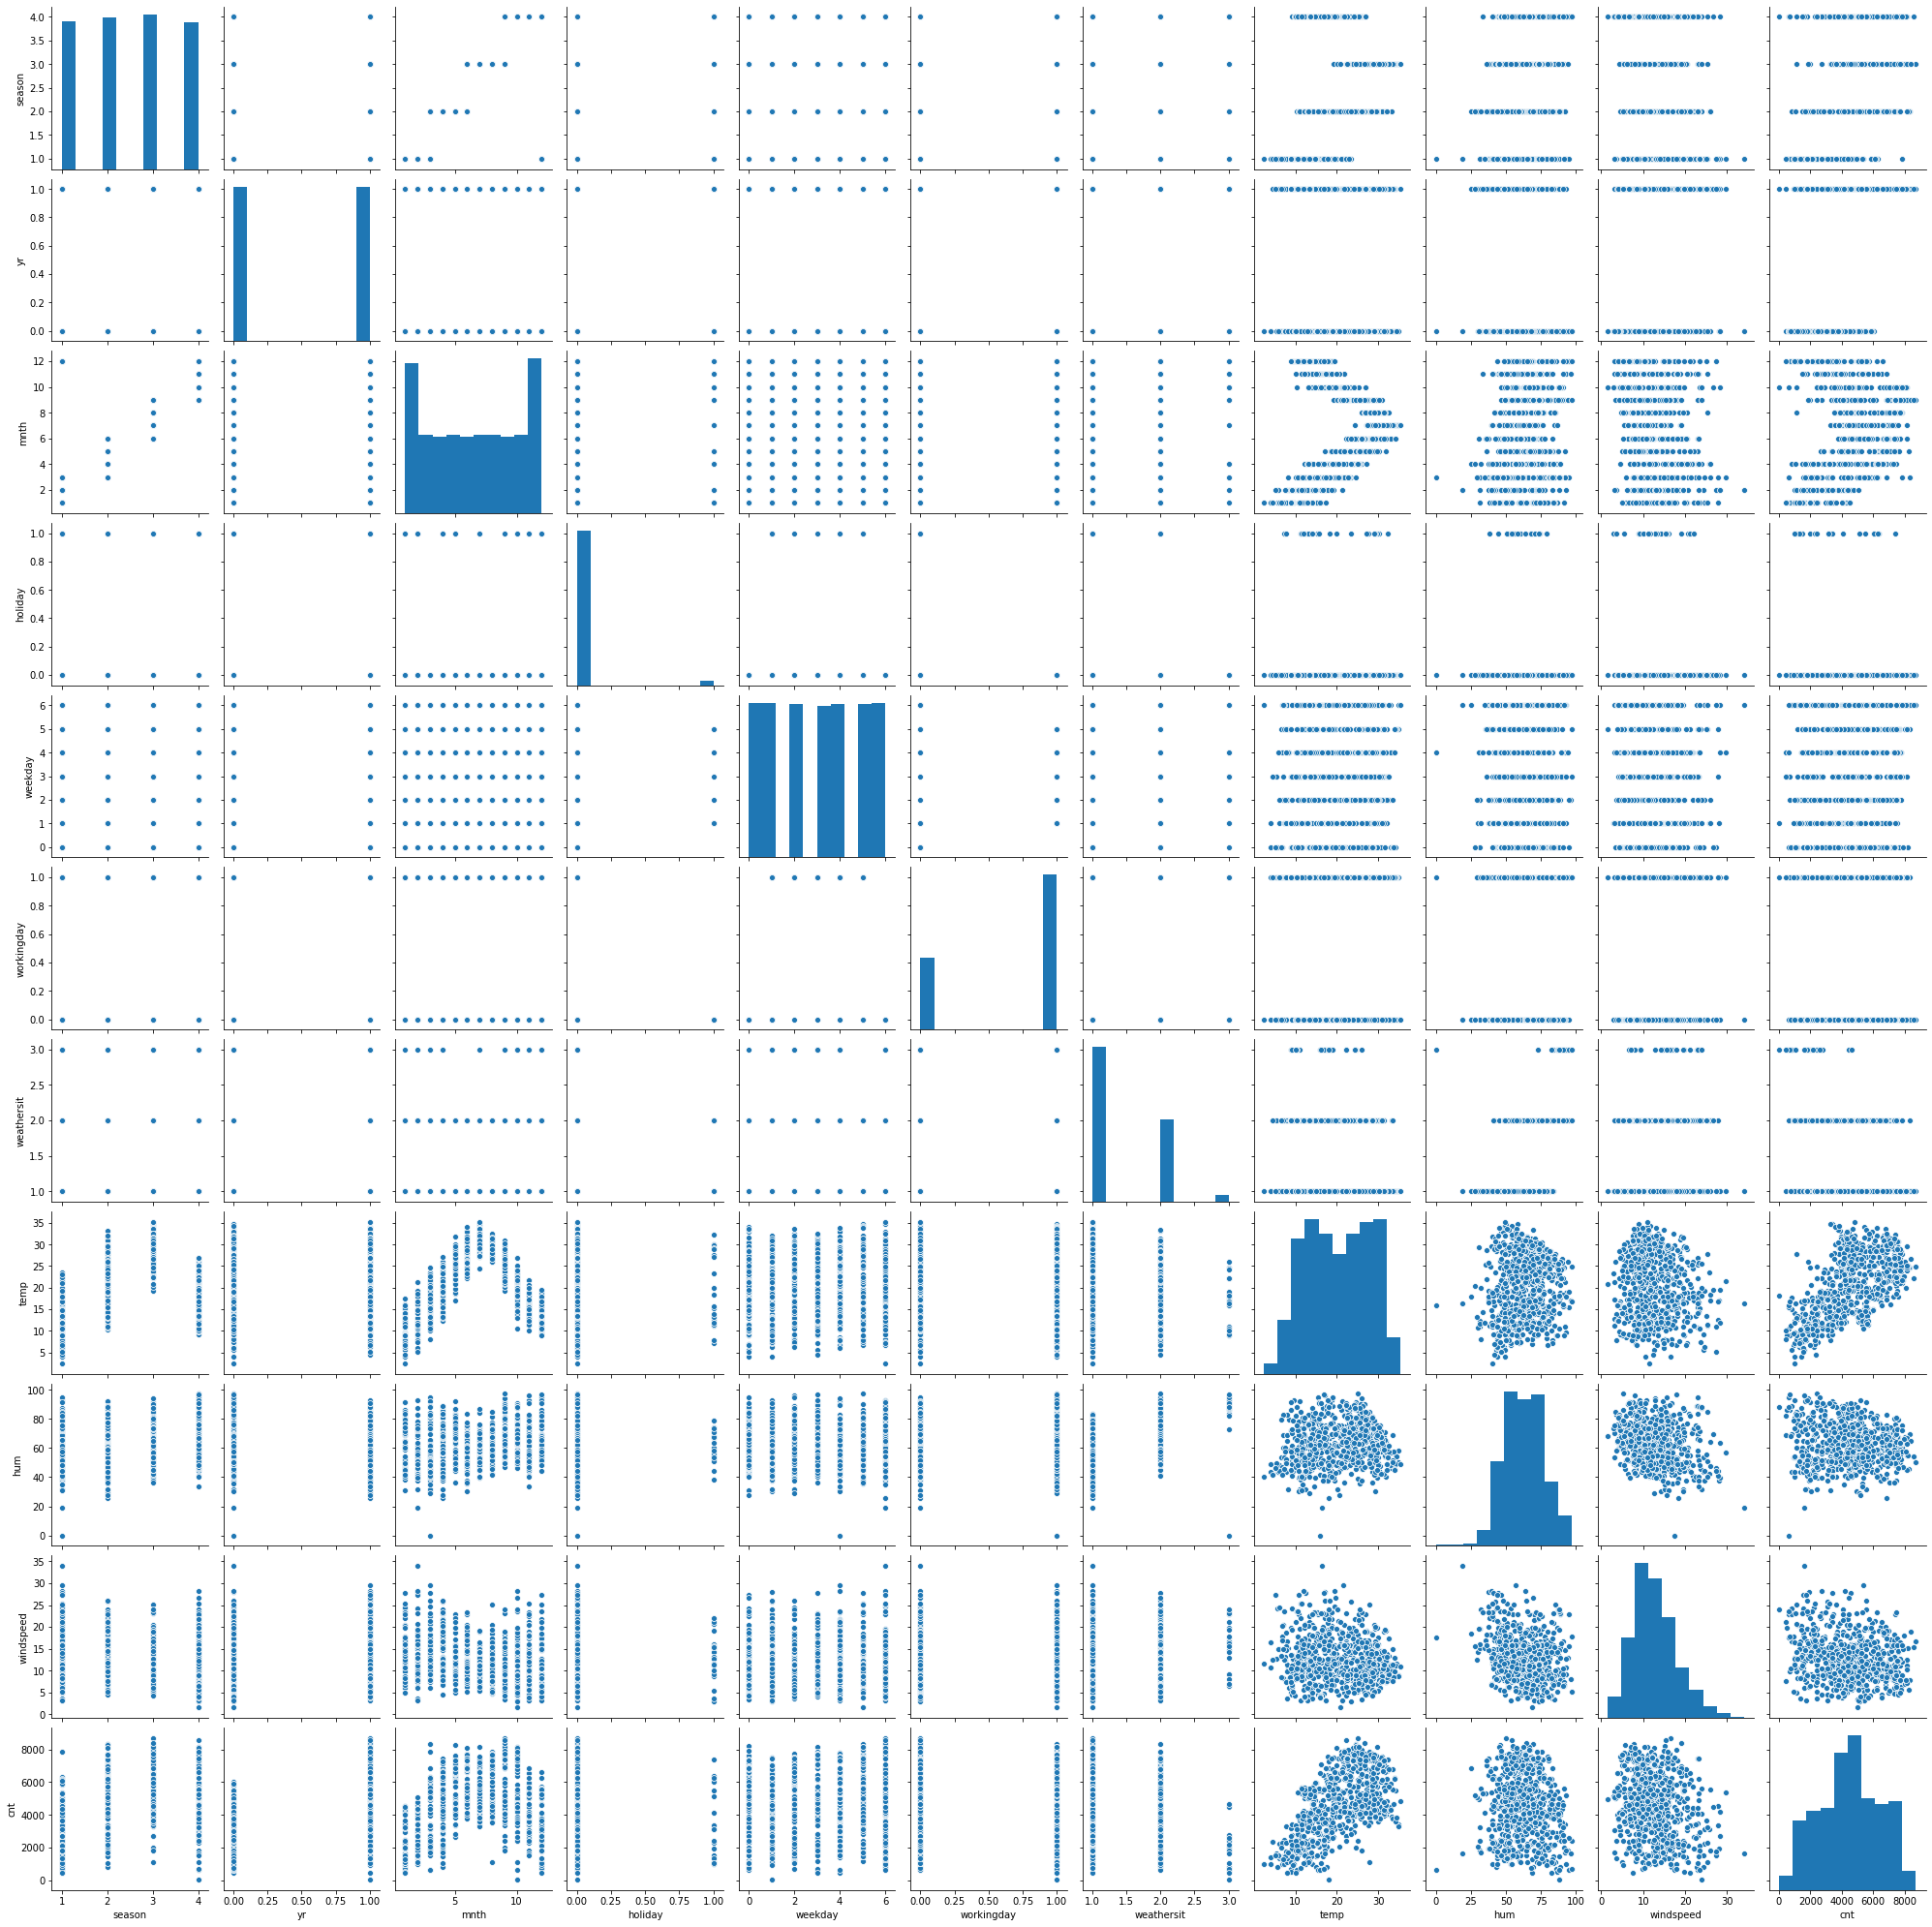

In [93]:
sns.pairplot(df)
plt.show()

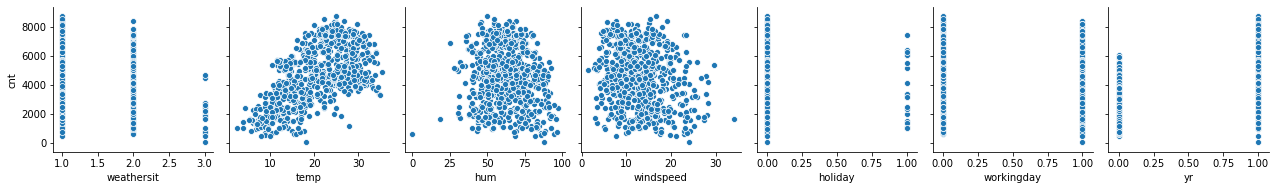

In [94]:
# Pairplot of the numerical variables with "y" as "cnt"
sns.pairplot(data = df, x_vars =["weathersit","temp","hum","windspeed","holiday","workingday","yr"], y_vars = ["cnt"])
plt.show()

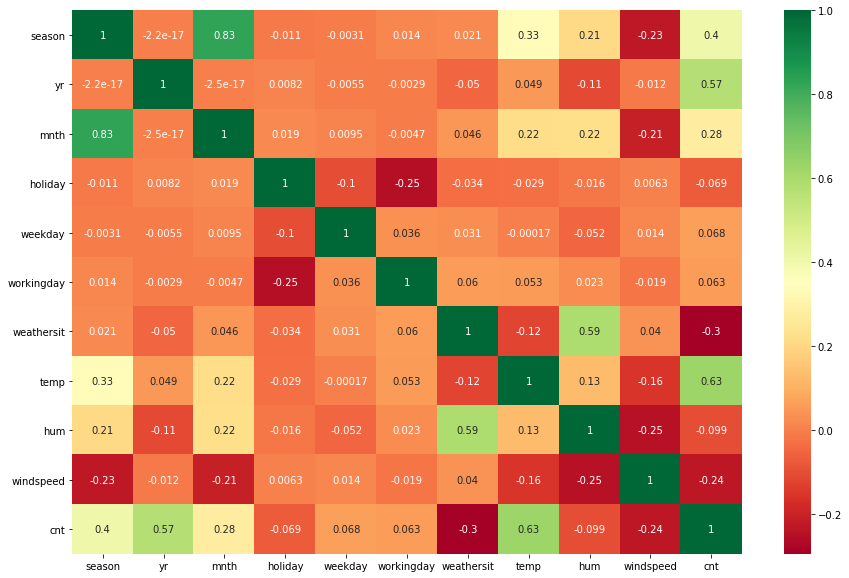

In [95]:
plt.figure(figsize = [15,10])
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

### Vizualizing categorical variables

####  Replacing categorial columns with their corresponding categories

In [96]:
df.weathersit = df.weathersit.astype("str")
df.season = df.season.astype("str")
df.weekday = df.weekday.astype("str")

In [97]:
df.weathersit = df.weathersit.apply(lambda x : x.replace("1","Clear").replace("2","Mist and Cloudy").replace("3","Light Snow/Rain").replace("4","Heavy Rain/Snow"))

In [98]:
df.season = df.season.apply(lambda x: x.replace("1","Spring").replace("2","Summer").replace("3","Fall").replace("4","Winter"))

In [99]:
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [100]:
df.weekday = df.weekday.apply(lambda x: x.replace("0","Sunday").replace("1","Monday").replace("2","Tuesday").replace("3","Wednesday").replace("4","Thursday").replace("5","Friday").replace("6","Saturday"))

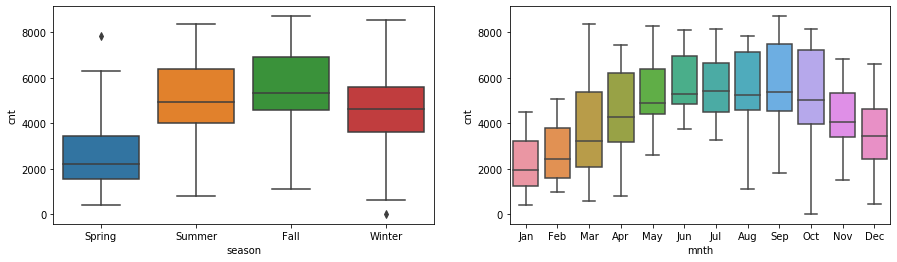

In [101]:
plt.figure(figsize = [15,4])
plt.subplot(1,2,1)
sns.boxplot(data = df, x = "season", y = "cnt")
plt.subplot(1,2,2)
sns.boxplot(data = df, x = "mnth", y = "cnt")
plt.show()

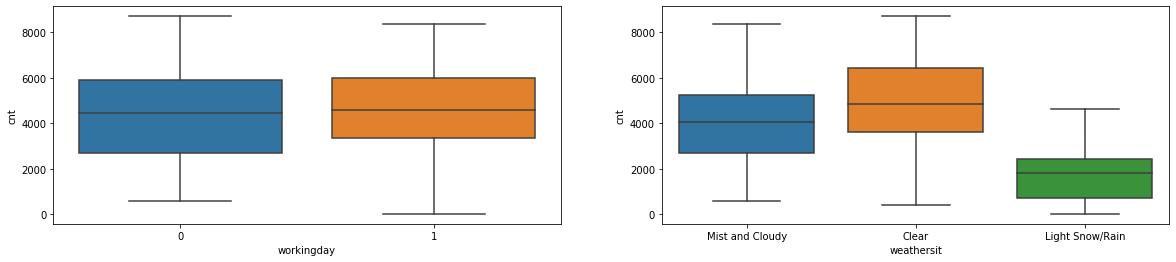

In [102]:
plt.figure(figsize = [20,4])
plt.subplot(1,2,1)
sns.boxplot(data = df, x = "workingday", y = "cnt")
plt.subplot(1,2,2)
sns.boxplot(data = df, x = "weathersit", y = "cnt")
plt.show()

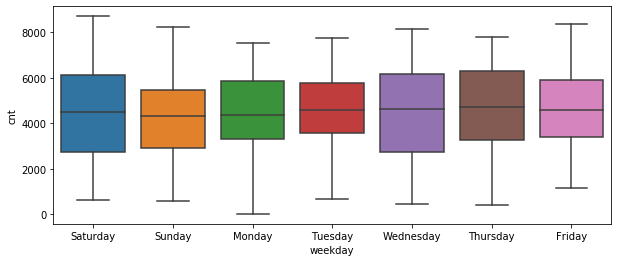

In [103]:
plt.figure(figsize = [10,4])
sns.boxplot(data = df, x = "weekday", y = "cnt")
plt.show()

### Creating Dummy Variables for the categorical columns

#### Season column

In [104]:
status = pd.get_dummies(df['season'], drop_first = True)

In [105]:
df = pd.concat([df,status], axis = 1)

In [106]:
df.drop("season", axis = 1, inplace = True)

In [107]:
df

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,Jan,0,Saturday,0,Mist and Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sunday,0,Mist and Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,Dec,0,Thursday,1,Mist and Cloudy,10.420847,65.2917,23.458911,2114,1,0,0
726,1,Dec,0,Friday,1,Mist and Cloudy,10.386653,59.0000,10.416557,3095,1,0,0
727,1,Dec,0,Saturday,0,Mist and Cloudy,10.386653,75.2917,8.333661,1341,1,0,0
728,1,Dec,0,Sunday,0,Clear,10.489153,48.3333,23.500518,1796,1,0,0


#### Weather sitauation column

In [108]:
status = pd.get_dummies(df['weathersit'], drop_first = True)

In [109]:
df = pd.concat([df,status], axis = 1)

In [110]:
df.drop(["weathersit"], axis = 1, inplace = True)

In [111]:
df

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow/Rain,Mist and Cloudy
0,0,Jan,0,Saturday,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,Jan,0,Sunday,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,Jan,0,Monday,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,Jan,0,Tuesday,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,Jan,0,Wednesday,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,Dec,0,Thursday,1,10.420847,65.2917,23.458911,2114,1,0,0,0,1
726,1,Dec,0,Friday,1,10.386653,59.0000,10.416557,3095,1,0,0,0,1
727,1,Dec,0,Saturday,0,10.386653,75.2917,8.333661,1341,1,0,0,0,1
728,1,Dec,0,Sunday,0,10.489153,48.3333,23.500518,1796,1,0,0,0,0


#### Weekday column

In [112]:
status = pd.get_dummies(df["weekday"], drop_first = True)

df = pd.concat([df,status], axis = 1)

df.drop("weekday", axis = 1, inplace = True)

df

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow/Rain,Mist and Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,Jan,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0
1,0,Jan,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0
2,0,Jan,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0
3,0,Jan,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0
4,0,Jan,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,Dec,0,1,10.420847,65.2917,23.458911,2114,1,0,0,0,1,0,0,0,1,0,0
726,1,Dec,0,1,10.386653,59.0000,10.416557,3095,1,0,0,0,1,0,0,0,0,0,0
727,1,Dec,0,0,10.386653,75.2917,8.333661,1341,1,0,0,0,1,0,1,0,0,0,0
728,1,Dec,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,0,0,0,1,0,0,0


#### Month column

In [113]:
status = pd.get_dummies(df['mnth'], drop_first = True)

df = pd.concat([df,status], axis = 1)

df.drop("mnth", axis = 1, inplace = True)

df

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,1,0,0,0,0,0,0,0,0,0
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,...,1,0,0,0,0,0,0,0,0,0
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [114]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'Light Snow/Rain', 'Mist and Cloudy',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep'],
      dtype='object')

## _Creating Models_

### Splitting the Data into Training and Testing Sets

In [115]:
df_train,df_test = train_test_split(df, train_size = 0.70, random_state = 100)

In [116]:
df

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,1,0,0,0,0,0,0,0,0,0
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,...,1,0,0,0,0,0,0,0,0,0
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### Rescaling the Features using MinMaxScaler

In [117]:
scaler = MinMaxScaler()

In [118]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'Light Snow/Rain', 'Mist and Cloudy',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep'],
      dtype='object')

In [119]:
num_vars = df.columns 

In [120]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [121]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.827658,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,0.465255,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
728,1.0,0.0,0.0,0.245101,0.498067,0.663106,0.204096,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.482973,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,1.0,0.345824,0.751824,0.380981,0.191095,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Dividing into X_train and y_train

In [122]:
y_train = df_train.pop("cnt")
X_train = df_train

#### Building the model using RFE

In [123]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]

### Building model using statsmodel, for the detailed statistics

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

#summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.22e-191
Time:                        14:36:24   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036     

In [124]:
# Calculating the VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.60
7,Spring,5.08
4,temp,3.89
9,Winter,3.59
8,Summer,2.65
5,hum,1.91
3,workingday,1.88
12,Saturday,1.78
11,Mist and Cloudy,1.57
13,Jan,1.57


__`January month` is insignificant in presence of other variables; can be dropped__

In [125]:
X_train_rfe.drop("Jan", axis = 1, inplace = True)

### Linear model 2

In [126]:
lm_2 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.11e-191
Time:                        14:36:24   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2402      0.036     

__`July month` is insignificant in presence of other variables; can be dropped__

In [127]:
X_train_rfe.drop("Jul", axis = 1, inplace = True)

### Linear model 3

In [128]:
lm_3 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.29e-190
Time:                        14:36:25   Log-Likelihood:                 512.96
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     496   BIC:                            -938.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2264      0.036     

__`September month` is insignificant in presence of other variables; can be dropped__

In [129]:
X_train_rfe.drop("Sep", axis = 1, inplace = True)

### Linear model 4

In [130]:
lm_4 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.95e-184
Time:                        14:36:25   Log-Likelihood:                 494.76
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     497   BIC:                            -908.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2454      0.037     

__`Saturday` is insignificant in presence of other variables; can be dropped__

In [131]:
X_train_rfe.drop("Saturday", axis = 1, inplace = True)

### Linear model 5

In [132]:
lm_5 = sm.OLS(y_train,X_train_rfe).fit()   
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.22e-182
Time:                        14:36:25   Log-Likelihood:                 487.81
No. Observations:                 510   AIC:                            -951.6
Df Residuals:                     498   BIC:                            -900.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2809      0.036     

In [133]:
# Calculating the VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.98
7,Spring,4.55
4,temp,3.50
9,Winter,3.10
8,Summer,2.07
5,hum,1.87
11,Mist and Cloudy,1.56
10,Light Snow/Rain,1.24
6,windspeed,1.20
2,holiday,1.07


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using __`lm_5 or linear model 5`__ only.

## _Residual Analysis of the train data_

In [134]:
y_train_pred = lm_5.predict(X_train_rfe)

In [135]:
res = y_train - y_train_pred

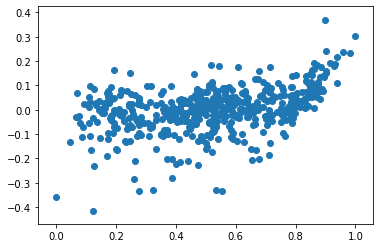

In [136]:
## Looking for patterns in residuals
plt.scatter(y_train,res)
plt.show()

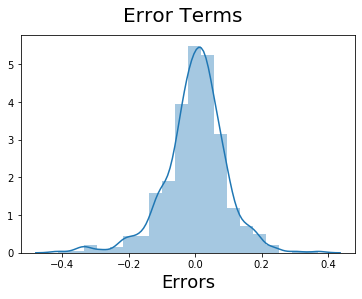

In [137]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 
plt.show()

The error terms are centered around zero

## _Making Predictions_

#### Applying the scaling on the test sets

In [138]:
num_vars = df.columns

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [139]:
y_test = df_test.pop('cnt')
X_test = df_test

In [140]:
X_test = sm.add_constant(X_test)

In [141]:
X_test = X_test[X_train_rfe.columns]

In [142]:
y_pred = lm_5.predict(X_test)

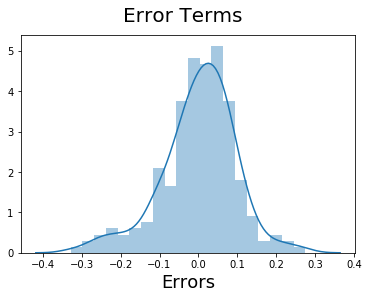

In [143]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 
plt.show()

The error terms are centered around zero

## _Model Evaluation_

In [144]:
y_pred.mean()

0.5215872577772296

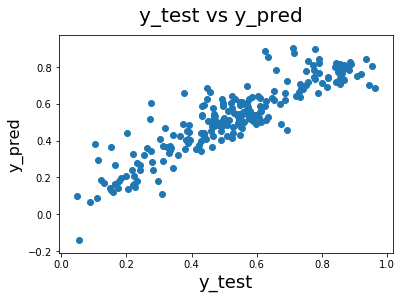

In [145]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)    
plt.ylabel('y_pred', fontsize=16)   
plt.show()

In [146]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8064632134212595

The r2 score for the test set has come out to be 0.806 or 80.6 % which is close to the r2 score in the training set which was 0.833 or 83.3 %, hence we can conclude that what the model had learnt in the training set it is able to generalize in the test set.

We can see that the equation of our best fitted line is:

cnt =  yr x	0.2303 + holiday x -0.0744 + workingday x 0.0174 + temp	x 0.4949 + hum x -0.1398 + windspeed x -0.1810 + Spring	x -0.0746 + Summer	x 0.0429 + Winter x	0.0880 + Light Snow/Rain x -0.2413 + Mist and Cloudy x -0.0530 + 0.2809	